# Exploring a Mystery Dataset

There's a famous dataset that's so tiny, I can just put it right into this notebook.  It's a bit of a weird dataset, though: it's really four datasets, with one predictor for each response.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean

plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
df = pd.DataFrame([[10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58] ,
                   [8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76],
                   [13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],
                   [9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
                   [11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],
                   [14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
                   [6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],
                   [4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
                   [12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],
                   [7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
                   [5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89]], 
                 columns = ['x_1','y_1','x_2','y_2','x_3','y_3','x_4','y_4'])

df

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


See what I mean?  Four $x$, $y$ pairs.  Let's graph it.  Create a linear regression for each (don't forget to reshape the $x$'s, because they're 1-dimensional!), and then a scatter plot with the regression line drawn.

0.666542459509
0.666242033727
0.666324041067
0.666707256898


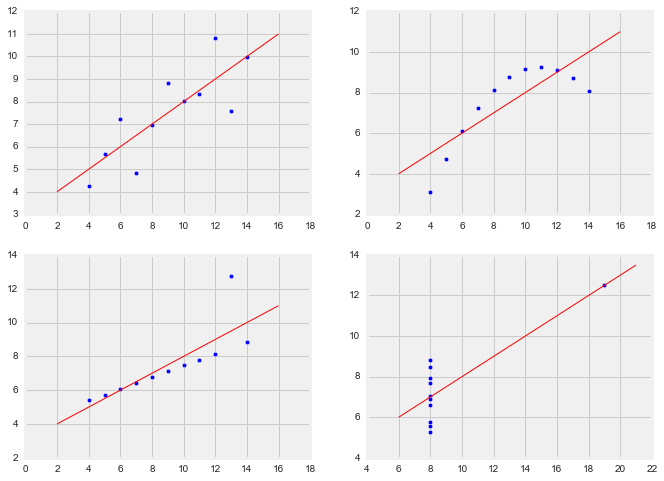

In [16]:
figure = plt.figure(figsize=(10,8))
axs = [figure.add_subplot(2,2,i) for i in range(1,5)]
# access your subplot objects as axs[0] for the top left, ax[2] for bottom left, etc.
xval = ['x_1','x_2','x_3','x_4']
yval = ['y_1','y_2','y_3','y_4']
models = [] # holds your four models.  You'll need them later!
for i in range(1,5):
    # Create a regression:
    X = df[xval[i-1]]
    X = X.reshape(-1,1)
    y = df[yval[i-1]]
    model = LinearRegression()
    model.fit(X,y)
    models.append(model)
    
    r = model.score(X,y)
    print(r)
    m1 = model.coef_[0]                  
    b = model.intercept_
    y1_fit = m1*df[xval[i-1]]+b  
    
    axs[i-1].scatter(df[xval[i-1]],df[yval[i-1]])
    x = np.linspace(min(X)-2,max(X)+2, 10)
    abline_values = [m1 * i + b for i in x]
    axs[i-1].plot(x, abline_values, 'r', linewidth = 1)
    

Describe what you're seeing.  Can you summarize each plot?  Tell me also about the different regression lines.  How similar are they?

We notice that all the R-squared values are extremely close to one another, even though each set of data is so different
The first plot has data that is more random than the others, but seems to be following a trend in the shape of a polynomial
The second plot perfectly fits the trend of a polynomial without having any noise or outliers
The third plot is a nearly perfect line, except for one outlier
The last plot is a perfect vertical line, except for one outlier. This vertical line doesn't tell us much because all the x values are 8, and we can't tell how y changes with respect to x

## p-values

Let's dive a little bit back into p-values, just so that you know about their existence if you need to validate your models in the future.  If I want to calculate a p-value for a linear regression coefficient (an $m$ or a $b$), then the alternative hypothesis is that the coefficient is non-zero.  So the null hypothesis is that the coefficient is zero.  We'll use a technique called bootstrapping to calculate the p-values.  Fill in the following code.    

In [29]:
from random import randint
def bootstrap(x, y, N=10000):
    """ Given column x and y, construct N bootstrapped samples of the pairs 
    (x,y).  That is, create a list of indices of the data, randomly drawn with 
    replacement, and sample your data with that list of indices.
    """
    for i in range(N):
        sample_inds = random.sample(range(len(x)), int(len(x)/2))
        yield (x.loc[sample_inds],y.loc[sample_inds])

Woah, `yield`?  That's a new one!  It replaces `return`, and it turns a call to `bootstrap` into something which returns a __generator__.  Generators are useful for all kinds of reasons, like for example in our situation where you may not want to store all these objects in memory after you make them (what if I decided to make `N` = 2 trillion?).  You generate each one when you need it.  They're even more useful when you want to create something which would give you a truly infinite list.  You can read more about them [here](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/), though that blog post is long, and I won't test you on it.  Their basic example is a primes generator: it returns the next prime each time it gets run, and since there are [infinitely many primes](https://primes.utm.edu/notes/proofs/infinite/euclids.html), you couldn't use a list for this, nor a regular function (without some global variables or weird parameters, or turning it into a method of some class; any of these would be less ideal).

In [ ]:
for i in range(1,5):
    df_x, df_y = df['x_' + str(i)], df['y_' + str(i)]
    m, b = models[i-1].coef_,models[i-1].intercept_
    intercepts = []
    slopes = []
    for x, y in bootstrap(df_x, df_y):
        x = x.reshape(-1,1)
        model_ = LinearRegression()
        model_.fit(x,y)
        slopes.append(model_.coef_[0])
        intercepts.append(model_.intercept_)
        # Fit a linear model on this new x and y (these are the bootstrap samples) and 
        # add its slope to slopes and intercept to intercepts.
        
    mm = mean(slopes)     # The p-values below would otherwise calculate these 
    print(mm)
    mb = mean(intercepts) # each time, which would really slow things down
    print(mb)
    
    # Calculate the p-value.  We subtract the mean because that's exactly the null hypothesis:
    # if m or b should be zero, then subtracting its mean shoudn't change it (but it does, because
    # the null hypothesis is false here.)  In order to not confuse you on "which" mean I was 
    # talking about, I took the outside one by hand.
    p_m = sum([1 if (abs(i - mm)> abs(m)) else 0 for i in slopes])/len(slopes)
    p_b = sum([1 if (abs(i - mb)> abs(b)) else 0 for i in intercepts])/len(intercepts)
    
    print("p-value for the coefficients of model {}: p_m = {}, p_b = {}".format(i, p_m, p_b))

What do you take from these?  Are these "valid" regressions, _i.e._ should you reject the null hypotheses that the coefficients are zero? Why?

Models 1 and 3 are valid regressions. Model 2 is not valid. It is a polynomial. Model 4 is also not valid. 